In [2]:
import glob
import pickle
import itertools
import numpy as np 
import pandas as pd
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer


/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_8412/3296619640.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
for elem in glob.glob(f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/*.csv"):
    print(elem)  

/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real2_part2_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/syn3_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real1_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/syn5_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/syn2_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/syn4_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/syn1_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real2_part1_final.csv
/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real2_final.csv


In [6]:
dataset = "real2_final"
file = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/{dataset}.csv"

In [4]:
# To get final results
final = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real2_part2_final.csv"

# read_file and check type
orig_df = pd.read_csv(final,sep='\t')
display(orig_df.info())


/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_8412/2435180217.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  orig_df = pd.read_csv(final,sep='\t')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63861 entries, 0 to 63860
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        63861 non-null  int64  
 1   Chr               63861 non-null  object 
 2   START_POS_REF     63861 non-null  int64  
 3   END_POS_REF       63861 non-null  int64  
 4   REF               63861 non-null  object 
 5   ALT               63861 non-null  object 
 6   REF_MFVdVs        63861 non-null  object 
 7   ALT_MFVdVs        63861 non-null  object 
 8   Sample_Name       63861 non-null  object 
 9   FILTER_Mutect2    63861 non-null  bool   
 10  FILTER_Freebayes  63861 non-null  bool   
 11  FILTER_Vardict    63861 non-null  bool   
 12  FILTER_Varscan    63861 non-null  bool   
 13  m2_MQ             12328 non-null  float64
 14  m2_FS             12328 non-null  float64
 15  m2_MQ0            12328 non-null  float64
 16  m2_MQRankSum      12327 non-null  float6

None

In [7]:
# read_file and check type
orig_df = pd.read_csv(file,sep='\t')
orig_df = orig_df.dropna(subset=['FILTER_Mutect2', 'FILTER_Freebayes','FILTER_Vardict','FILTER_Varscan'])

# Ensure type if this step fails check
# orig_df = orig_df.astype({"f_AC": 'float64',"f_AF": 'float64',"f_LEN": 'float64'})
display(orig_df.info())

#  45  f_AC              42745 non-null  object 
#  46  f_AF              42745 non-null  object 
#  47  f_LEN             42745 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22613 entries, 0 to 22612
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        22613 non-null  int64  
 1   Chr               22613 non-null  int64  
 2   START_POS_REF     22613 non-null  int64  
 3   END_POS_REF       22613 non-null  int64  
 4   REF               22613 non-null  object 
 5   ALT               22613 non-null  object 
 6   REF_MFVdVs        22613 non-null  object 
 7   ALT_MFVdVs        22613 non-null  object 
 8   Sample_Name       22613 non-null  object 
 9   FILTER_Mutect2    22613 non-null  bool   
 10  FILTER_Freebayes  22613 non-null  bool   
 11  FILTER_Vardict    22613 non-null  bool   
 12  FILTER_Varscan    22613 non-null  bool   
 13  m2_MQ             5096 non-null   float64
 14  m2_FS             5096 non-null   float64
 15  m2_MQ0            5096 non-null   float64
 16  m2_MQRankSum      5095 non-null   float6

/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_6905/1504867127.py:2: DtypeWarning: Columns (23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  orig_df = pd.read_csv(file,sep='\t')


None

In [5]:
# # Process unclean rows
# print(np.unique(orig_df['f_AC'].astype(str)))
# print(np.unique(orig_df['f_AF'].astype(str)))
# print(np.unique(orig_df['f_LEN'].astype(str)))

In [5]:
features_to_remove = [
    'REF',
    'Unnamed: 0',
    'Chr',
    'START_POS_REF',
    'END_POS_REF',
    'f_AF',
    'f_GTI',
    'f_AC',
    'f_NUMALT',
    'f_AO',
    'f_LEN',
    'f_AN',
    'ALT',
    'REF_MFVdVs',
    'ALT_MFVdVs',
    'Sample_Name',
    'vd_SAMPLE',
    'f_MIN_DP',
    'm2_PON',
    'f_NS',
    'f_PAO',
    'f_PQR',
    'f_PRO',
    'f_PQA',
    'f_QA',
    'f_RO',
    'f_RPL',
    'is_snv']

feature_list = [x for x in list(orig_df.columns) if x not in features_to_remove]
display(len(feature_list))


29

[Text(0, 0, '97.9525'), Text(0, 0, '2.04749')]

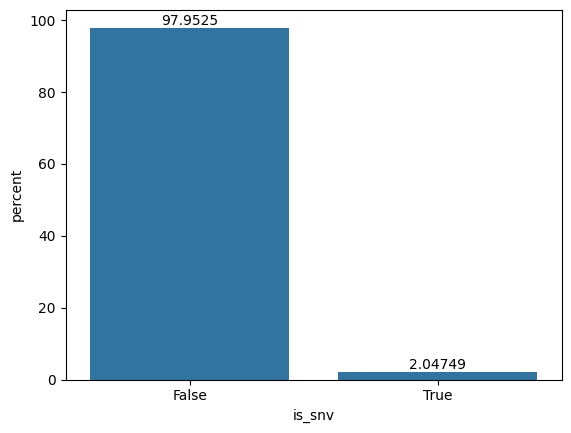

In [9]:
# Check for the proportion of SNV and non SNV
ax = sns.countplot(orig_df, x="is_snv", stat="percent")
ax.bar_label(ax.containers[0])

# Reduction in Class Imbalanced Sampling Methods 

## Down Sampling

In [9]:

# Separate class
classes = { 
    "class_0" : (orig_df[orig_df['is_snv'] == 0], len(orig_df[orig_df['is_snv'] == 0])),
    "class_1" : (orig_df[orig_df['is_snv'] == 1], len(orig_df[orig_df['is_snv'] == 1]))
 } # print the shape of the class

print('class 0:', classes["class_0"][0].shape)
print('class 1:', classes["class_1"][0].shape)
val_prev = 0

for key, value in classes.items():
    if value[1] > val_prev:
        max_class = key
        val_prev = value[1]
min_class = [elem for elem in classes.keys() if max_class not in elem][0]
max_class_df = classes[max_class][0]
min_class_df = classes[min_class][0]    

min_count = classes[min_class][1]  
max_count = classes[max_class][1]  

# Get the number of majority class to drop
maj_counts = round((min_count/0.4 * 0.6),0)
drop_num =  max_count - maj_counts
print(f"To drop : {drop_num}, maj counts: {maj_counts}")

class 0: (22150, 57)
class 1: (463, 57)
To drop : 21456.0, maj counts: 694.0


In [10]:
# Drop from the list of non-null
key_feature = ['m2_FS',
    'f_ABP',
    'f_PAIREDR',
    'vd_AF',
    'f_GTI',
    'm2_NLOD',
    'f_ODDS',
    'f_QR',
    'f_AO',
    'f_RPP']

keep_idx = list(max_class_df[feature_list].dropna().index)
kept_df = max_class_df.loc[keep_idx]
print(f"keep_idx len :: {len(keep_idx)}")
len_keep = len(kept_df)
if len_keep > maj_counts:
    print(f" maj_counts {maj_counts} , {len_keep} -- no need to sample")
    # Randomly sample from the kept_df 
    df = pd.concat([kept_df.sample(int(maj_counts)),min_class_df])
else:
    sample_num = maj_counts - len_keep
    sampled_maj = max_class_df[~max_class_df[key_feature].isna().any(axis=1)]
    sampled_maj = sampled_maj[~sampled_maj.index.isin(keep_idx)]
    keep_idx.extend(sampled_maj.index)
    print(f"keep_idx len 2:: {len(keep_idx)}")
    if (len(sampled_maj) >= sample_num): 
        print(f" sampled_maj {len(sampled_maj) } , {sample_num} -- no need to resample")
        sampled_maj = sampled_maj.sample(int(sample_num))
        df = pd.concat([kept_df,min_class_df,sampled_maj])

    elif len(sampled_maj) > 0:
        print(f" Resampled_maj due to insufficient data {len(sampled_maj) } , {sample_num} -- resample")
        new_int = sample_num - len(sampled_maj)
        new_kept = max_class_df[~max_class_df.index.isin(keep_idx)].sample(int(new_int))
        df = pd.concat([kept_df,new_kept,min_class_df,sampled_maj])

    else:
        print(f" Resampled from max due to empty data {len(sampled_maj) } , {sample_num} -- resample")
        # Sample everything
        new_kept = max_class_df.sample(int(sample_num))
        df = pd.concat([kept_df,new_kept,min_class_df])

# Check if total numbers match
print(f"Counts :: {(min_count + maj_counts)}, {df.shape[0]}")
assert (min_count + maj_counts) == df.shape[0], "Does not match in numbers"
print(f"df shape :: {df.shape}, Ensure no overlapping index :: {df.index.nunique()}")

keep_idx len :: 265
keep_idx len 2:: 335
 Resampled_maj due to insufficient data 70 , 429.0 -- resample
Counts :: 1157.0, 1157
df shape :: (1157, 57), Ensure no overlapping index :: 1157


In [7]:
# Change into features and labels 
# Dropping entirely null columns
# If no down sampling 
df = orig_df.copy()
x_df = df.copy().drop(columns=["is_snv","m2_PON","f_MIN_DP"])
y_df = df.copy()[["is_snv"]]

In [8]:
# Split data into categorical and non categorical
list_of_categorical = list()
list_of_numerical = list()

numerical = ["int64", "float64"]
for elem in x_df.dtypes.items():
    name, col_type = elem
    if col_type in numerical:
        print(f" numeric {col_type} :: {name}")
        list_of_numerical.append(name)
    else:
        print(f" cat {col_type} :: {name}")
        list_of_categorical.append(name)


 numeric int64 :: Unnamed: 0
 cat object :: Chr
 numeric int64 :: START_POS_REF
 numeric int64 :: END_POS_REF
 cat object :: REF
 cat object :: ALT
 cat object :: REF_MFVdVs
 cat object :: ALT_MFVdVs
 cat object :: Sample_Name
 cat bool :: FILTER_Mutect2
 cat bool :: FILTER_Freebayes
 cat bool :: FILTER_Vardict
 cat bool :: FILTER_Varscan
 numeric float64 :: m2_MQ
 numeric float64 :: m2_FS
 numeric float64 :: m2_MQ0
 numeric float64 :: m2_MQRankSum
 numeric float64 :: m2_NLOD
 numeric float64 :: f_MQMR
 numeric float64 :: f_MQM
 numeric float64 :: f_AB
 numeric float64 :: f_ABP
 numeric float64 :: f_AC
 numeric float64 :: f_AF
 numeric float64 :: f_AN
 numeric float64 :: f_AO
 numeric float64 :: f_GTI
 numeric float64 :: f_LEN
 numeric float64 :: f_MEANALT
 numeric float64 :: f_NS
 numeric float64 :: f_NUMALT
 numeric float64 :: f_ODDS
 numeric float64 :: f_PAIRED
 numeric float64 :: f_PAIREDR
 numeric float64 :: f_PAO
 numeric float64 :: f_PQA
 numeric float64 :: f_PQR
 numeric float6

In [9]:
# remove certain elements
list_of_categorical = [
 'FILTER_Mutect2',
 'FILTER_Freebayes',
 'FILTER_Vardict',
 'FILTER_Varscan',]

In [10]:
# Basic check of which rows have inf values
numerical_df = x_df[list_of_numerical].copy()
m = (numerical_df == np.inf)
inf_check = numerical_df.loc[m.any(axis=1), m.any(axis=0)]
display(inf_check) # Description="Odds ratio">
# Replace inf value with nan to prevent numerical overflow for imputation methods
# df.replace(np.inf, np.nan)

# OR=1 Exposure does not affect odds of outcome
# OR>1 Exposure associated with higher odds of outcome
# OR<1 Exposure associated with lower odds of outcome

# Should I replace inf with a high value?
numerical_df = numerical_df.replace(np.inf, 100)

,vd_SOR
0,inf
4,inf
5,inf
9,inf
10,inf
...,...
63439,inf
63440,inf
63441,inf
63442,inf


In [11]:
filt = ['m2_MQ',
 'm2_FS',
 'm2_MQ0',
 'm2_MQRankSum',
 'm2_NLOD',
 'f_MQMR',
 'f_MQM',
 'f_AB',
 'f_ABP',
 'f_MEANALT',
 'f_ODDS',
 'f_PAIRED',
 'f_PAIREDR',
 'f_QR',
 'f_RPP',
 'vs_DP',
 'vs_GPV',
 'vs_SPV',
 'vs_SSC',
 'vd_AF',
 'vd_DP',
 'vd_MSI',
 'vd_SOR',
 'vd_SSF',
 'vd_VD']

### Median imputation

In [12]:
numerical_median_imp = numerical_df[filt].copy()
# Impute with numerical columns mean
imp = SimpleImputer(missing_values=np.nan, strategy='median')
# Replacing the values
numerical_median_imp.iloc[:,:] = imp.fit_transform(numerical_median_imp)
display(numerical_median_imp.isna().sum())

m2_MQ           0
m2_FS           0
m2_MQ0          0
m2_MQRankSum    0
m2_NLOD         0
f_MQMR          0
f_MQM           0
f_AB            0
f_ABP           0
f_MEANALT       0
f_ODDS          0
f_PAIRED        0
f_PAIREDR       0
f_QR            0
f_RPP           0
vs_DP           0
vs_GPV          0
vs_SPV          0
vs_SSC          0
vd_AF           0
vd_DP           0
vd_MSI          0
vd_SOR          0
vd_SSF          0
vd_VD           0
dtype: int64

## Categorical feature processing

In [13]:
cat_features = x_df[list_of_categorical].copy()
# Convert Filter to boolean 1/0
filter_list = [elem for elem in cat_features.columns if "FILTER" in elem]
cat_features[filter_list] = cat_features[filter_list].astype('int32')
cat_features
display(cat_features)

,FILTER_Mutect2,FILTER_Freebayes,FILTER_Vardict,FILTER_Varscan
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,1
...,...,...,...,...
63856,0,0,0,1
63857,0,0,0,1
63858,1,0,0,0
63859,1,0,0,0


# Feature Selection

In [14]:
# Concat with the cat features
# mean_input = pd.concat([numerical_mean_imp,df[list_of_categorical]], axis=1)
median_input = pd.concat([numerical_median_imp,cat_features], axis=1)
# mode_input = pd.concat([numerical_mode_imp,df[list_of_categorical]], axis=1)

In [15]:
# remove positions
# mean_input = mean_input[feature_list]
median_input = median_input[feature_list]
# mode_input = mode_input[feature_list]

In [19]:
pos_idx = df[['Chr','START_POS_REF', 'END_POS_REF']]
y_idx = df.is_snv

print(f" Check the classes :: {y_idx.value_counts()} ")

assert len(pos_idx) == len(median_input) == len(y_idx), "All same length"

feature_set = {
    "median_input": median_input,
    "POS_IDX": pos_idx,
    "y_label" : y_idx
}

In [20]:
# Save Pickle file
filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set"
feature_filename =f"feature_set_{dataset}_final"
with open(f'{filepath}/{feature_filename}.pickle', 'wb') as handle:
    pickle.dump(feature_set, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"saved {dataset}")

saved combined
